<a href="https://colab.research.google.com/github/Faseeh56/Clustering_Project/blob/main/ClusteringProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace the filename below if your file has a different name
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv")

# Display the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Basic info and stats
df.info()
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


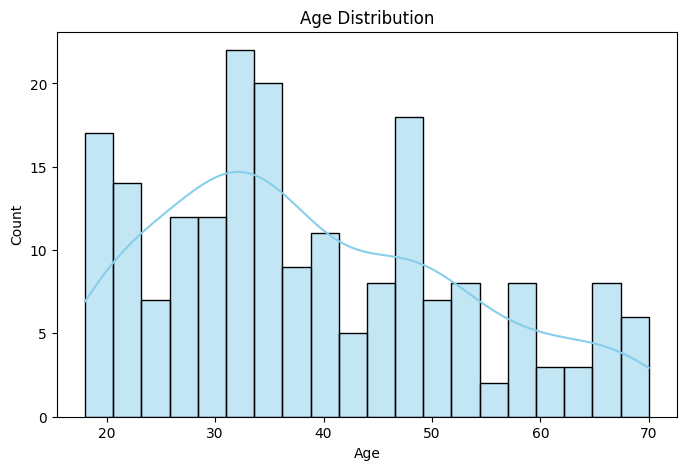

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

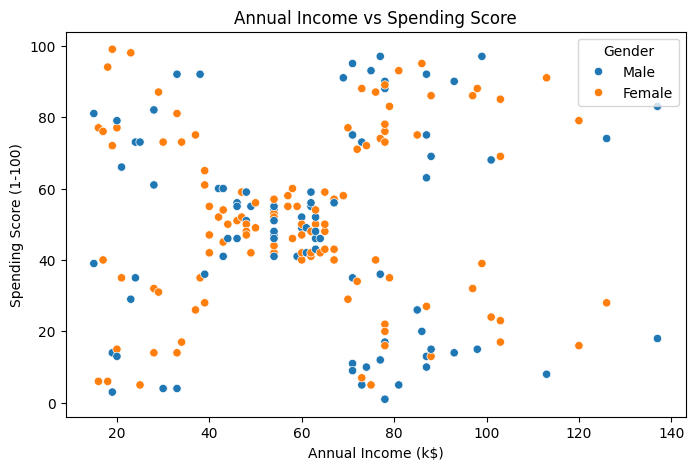

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Annual Income vs Spending Score')
plt.show()

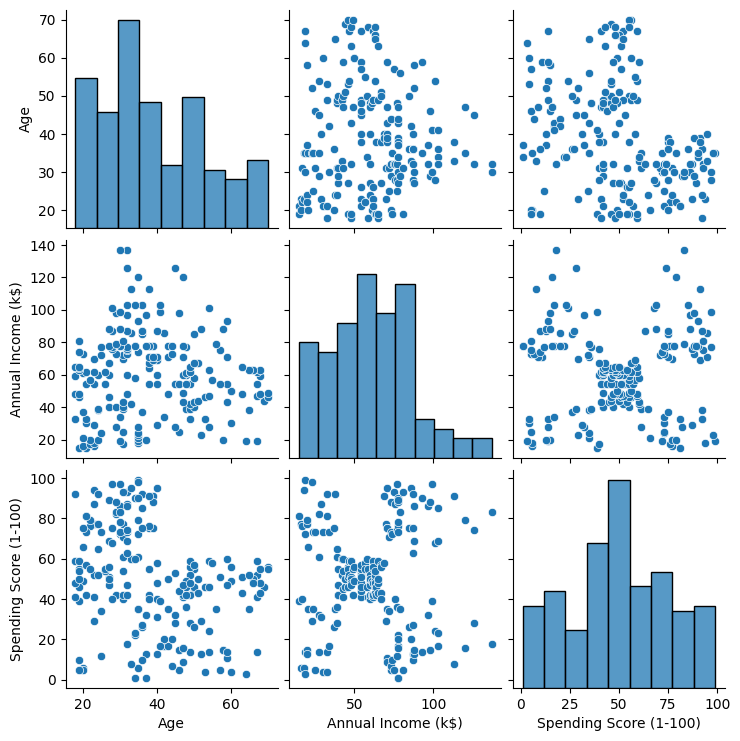

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

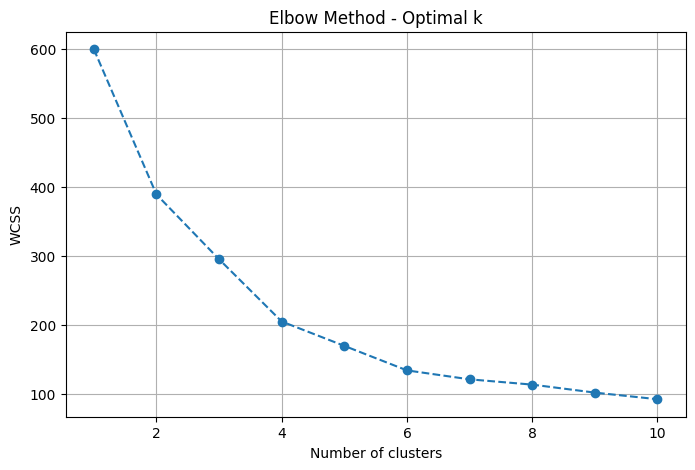

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Try different values of k (1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans with optimal number of clusters (replace 5 with your optimal k)
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster label to the original DataFrame
df['Cluster'] = clusters

# Show few rows with cluster
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


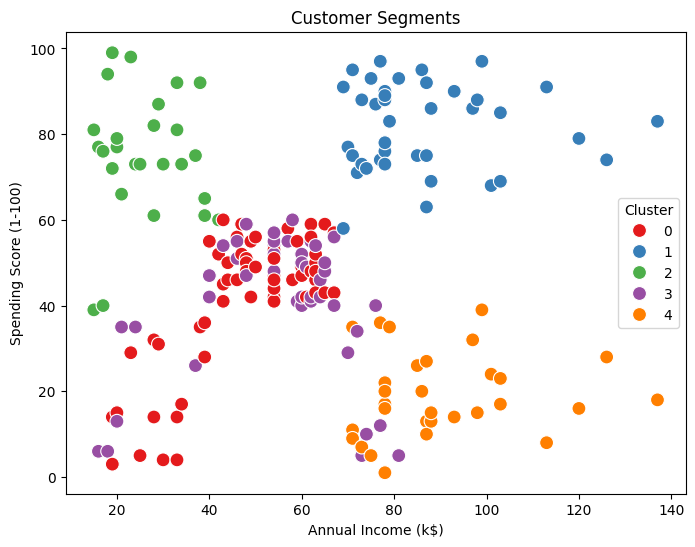

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Group by cluster and calculate the mean of each feature
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,68.775862,55.275862,47.620690,41.706897
1,161.025000,32.875000,86.100000,81.525000
2,23.461538,25.769231,26.115385,74.846154
3,86.377778,26.733333,54.311111,40.911111
4,166.870968,44.387097,89.774194,18.483871


In [ ]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster'],
      dtype='object')


In [ ]:
# Check for non-numeric columns
print(df.dtypes)


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
Cluster                    int32
dtype: object


In [ ]:
df_scaled = scaler.fit_transform(df.drop(['CustomerID', 'Gender'], axis=1))  # Excluding non-numerical columns


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical column 'Genre' as numeric values
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Now, scale the remaining numeric columns
df_scaled = scaler.fit_transform(df.drop(['CustomerID'], axis=1))  # Excluding non-numerical columns


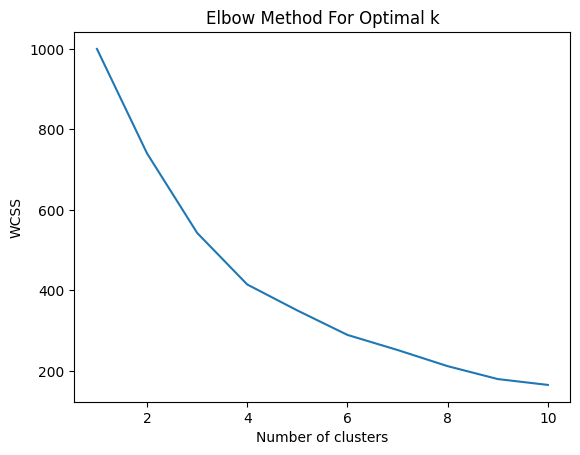

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):  # Trying different values of k (1 to 10)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Apply K-Means to the dataset with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = y_kmeans


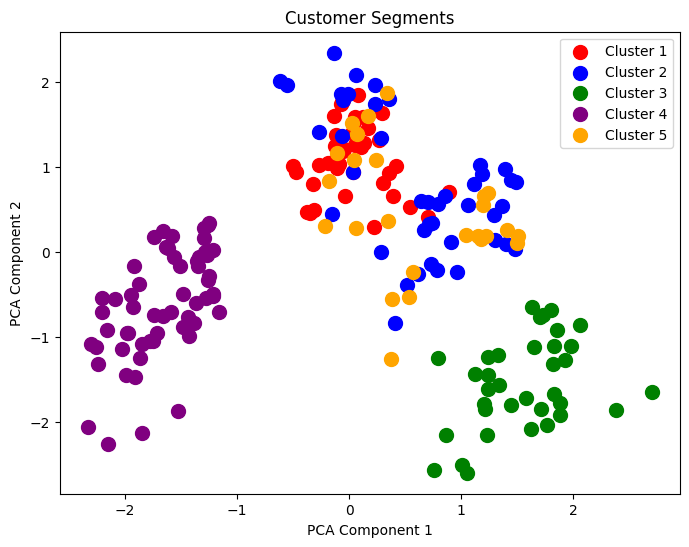

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components and cluster labels
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[df_pca['Cluster'] == 0]['PCA1'], df_pca[df_pca['Cluster'] == 0]['PCA2'], s=100, c='red', label='Cluster 1')
plt.scatter(df_pca[df_pca['Cluster'] == 1]['PCA1'], df_pca[df_pca['Cluster'] == 1]['PCA2'], s=100, c='blue', label='Cluster 2')
plt.scatter(df_pca[df_pca['Cluster'] == 2]['PCA1'], df_pca[df_pca['Cluster'] == 2]['PCA2'], s=100, c='green', label='Cluster 3')
plt.scatter(df_pca[df_pca['Cluster'] == 3]['PCA1'], df_pca[df_pca['Cluster'] == 3]['PCA2'], s=100, c='purple', label='Cluster 4')
plt.scatter(df_pca[df_pca['Cluster'] == 4]['PCA1'], df_pca[df_pca['Cluster'] == 4]['PCA2'], s=100, c='orange', label='Cluster 5')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
# Get the cluster centers (centroids) for each cluster
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df.drop('Cluster', axis=1).columns)

# Display the cluster centers
print(cluster_centers)


   CustomerID    Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    0.020146 -0.428806  0.974847            1.216085               -0.515509
1   -0.886405 -0.828222 -0.668438            0.158614                0.606222
2    0.264770  0.203510  1.056094           -1.277784                1.454836
3   -0.018062  1.178830 -0.493886           -0.329716               -1.198301
4    1.128152 -0.942297 -0.769496            0.341630                0.549648


In [ ]:
# Group the data by clusters and calculate the mean of each feature
cluster_summary = df.groupby('Cluster').mean()

# Display the cluster summary
print(cluster_summary)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0        161.025000  0.450000  32.875000           86.100000   
1         60.809524  0.000000  27.309524           43.047619   
2        164.428571  0.571429  41.685714           88.228571   
3         68.775862  0.431034  55.275862           47.620690   
4         54.440000  1.000000  25.720000           40.400000   

         Spending Score (1-100)  
Cluster                          
0                     81.525000  
1                     54.285714  
2                     17.285714  
3                     41.706897  
4                     59.000000  


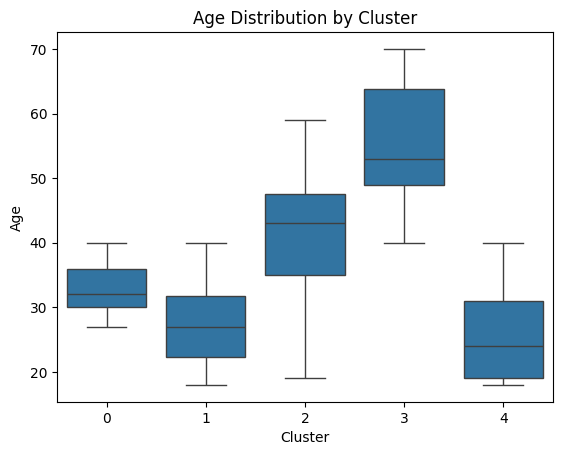

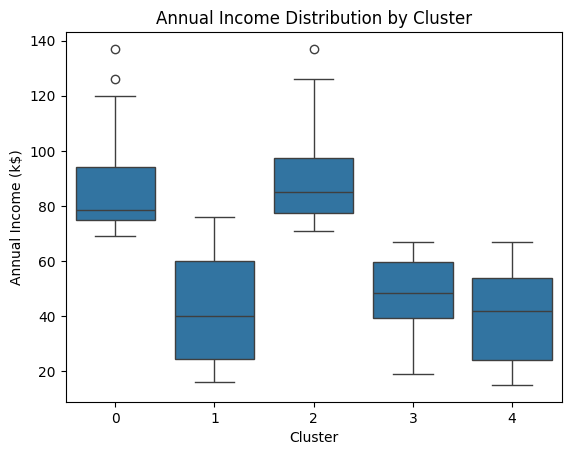

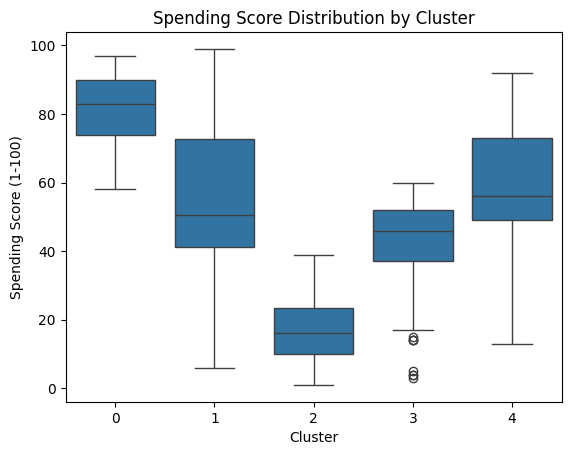

In [ ]:
import seaborn as sns

# Plot the distribution of features for each cluster
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Cluster')
plt.show()

sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Cluster')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3754837742944406


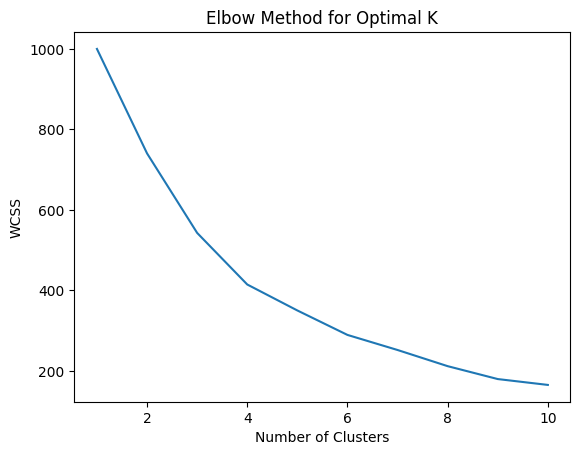

In [ ]:
import matplotlib.pyplot as plt

# Calculate WCSS for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(df_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 0.841888186522534


In [ ]:
# Get the inertia (WCSS) value
print(f"Inertia (WCSS): {kmeans.inertia_}")


Inertia (WCSS): 164.89528070040242


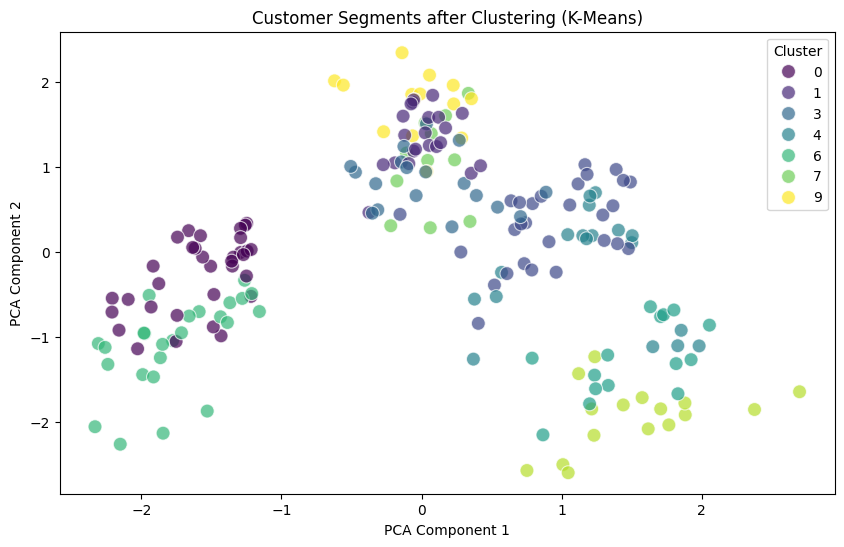

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments after Clustering (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


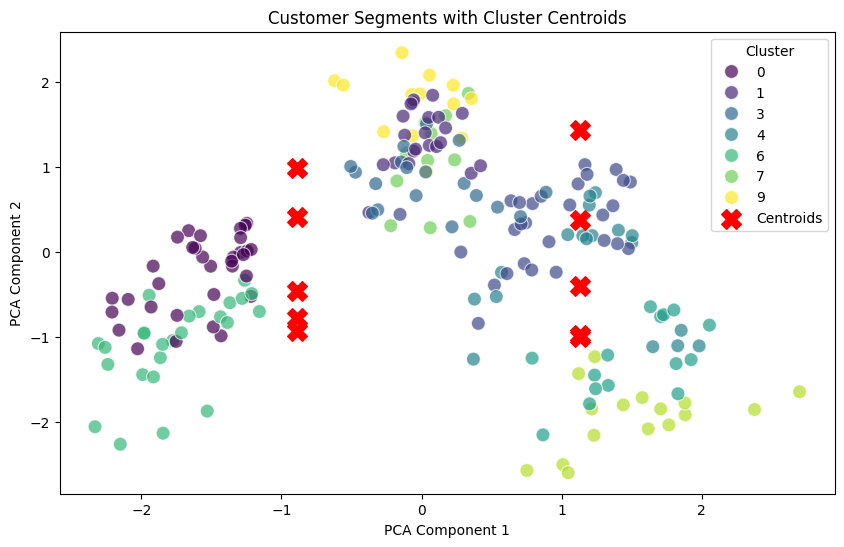

In [ ]:
# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Cluster Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


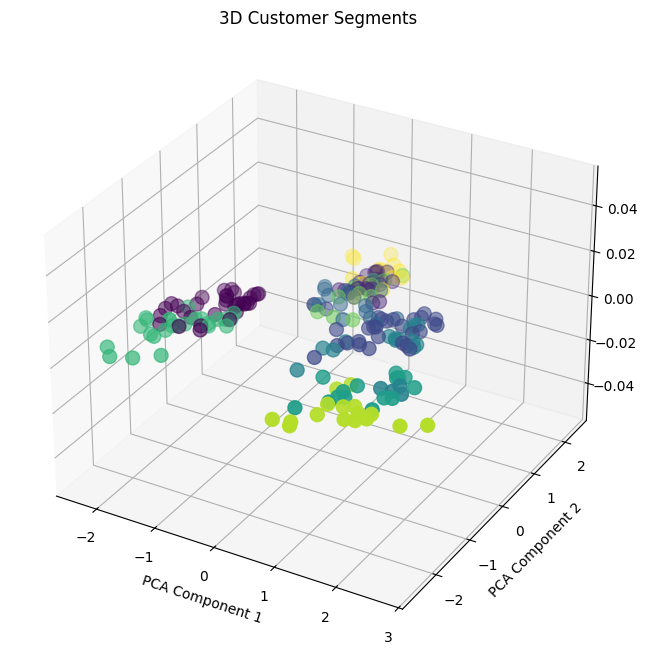

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Visualize the clusters in 3D space using PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use only the first two PCA components for 3D plotting
ax.scatter(pca_components[:, 0], pca_components[:, 1],  c=kmeans.labels_, cmap='viridis', s=100)
ax.set_title('3D Customer Segments')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
# Removing z-axis label since we're only using 2 components
# ax.set_zlabel('PCA Component 3')
plt.show()


In [ ]:
features_used = df.drop(['CustomerID', 'Gender'], axis=1).columns
print(features_used)
print(len(features_used))  # Should be 5


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster'], dtype='object')
4


In [ ]:
df_scaled = scaler.fit_transform(df.drop(['CustomerID', 'Gender', 'Cluster'], axis=1))


In [ ]:
features_used = df.drop(['CustomerID', 'Gender', 'Cluster'], axis=1).columns


In [ ]:
# Get the features used for clustering (excluding 'CustomerID', 'Gender', 'Cluster')
features_used = df.drop(['CustomerID', 'Gender', 'Cluster'], axis=1).columns

# Apply KMeans with the desired number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_scaled) # Assuming df_scaled is your scaled dataset with the 3 features

# Create a DataFrame with the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_used)

# Display the cluster centers
print(cluster_centers)

        Age  Annual Income (k$)  Spending Score (1-100)
0  1.204841           -0.235773               -0.052368
1  0.073331            0.974945               -1.197297
2 -0.428806            0.974847                1.216085
3  0.531074           -1.290508               -1.236467
4 -0.980679           -0.743060                0.467440


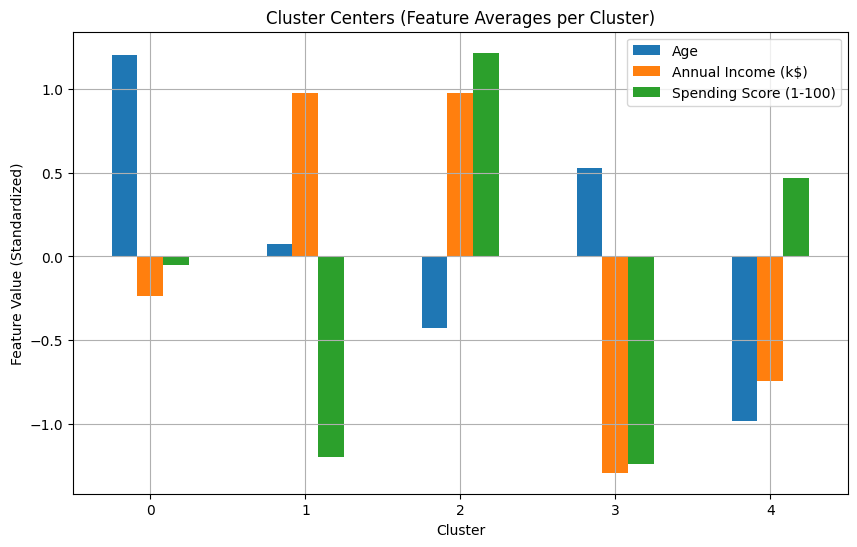

In [ ]:
import matplotlib.pyplot as plt

# Plot cluster centers
cluster_centers.plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Centers (Feature Averages per Cluster)")
plt.xlabel("Cluster")
plt.ylabel("Feature Value (Standardized)")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
for i in range(cluster_centers.shape[0]):
    print(f"Segment {i}:")
    print("-" * 30)
    center = cluster_centers.iloc[i]

    if center['Spending Score (1-100)'] > 0.5 and center['Annual Income (k$)'] > 0.5:
        print("💸 High-income, high-spending customers - potential VIPs.")
    elif center['Spending Score (1-100)'] > 0.5:
        print("🛍️ Low income but high spending - value seekers or impulsive buyers.")
    elif center['Annual Income (k$)'] > 0.5:
        print("🏦 High income but low spending - may need different marketing.")
    else:
        print("🧍‍♂️ Moderate/low-income and low spending - budget-conscious segment.")

    print(f"Average Age: {'Young' if center['Age'] < 0 else 'Older'}")
    print()


Segment 0:
------------------------------
🧍‍♂️ Moderate/low-income and low spending - budget-conscious segment.
Average Age: Older

Segment 1:
------------------------------
🏦 High income but low spending - may need different marketing.
Average Age: Older

Segment 2:
------------------------------
💸 High-income, high-spending customers - potential VIPs.
Average Age: Young

Segment 3:
------------------------------
🧍‍♂️ Moderate/low-income and low spending - budget-conscious segment.
Average Age: Older

Segment 4:
------------------------------
🧍‍♂️ Moderate/low-income and low spending - budget-conscious segment.
Average Age: Young



In [ ]:
# Save the clustered DataFrame to a CSV file
df.to_csv('clustered_customers.csv', index=False)

# Optional: Download it in Colab
from google.colab import files
files.download('clustered_customers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>